In [1]:
from pythtb import TBModel, WFArray, Mesh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def set_model(t, delta, lmbd):
    lat = [[1]]
    orb = [[0], [1/3], [2/3]]
    model = TBModel(1, 1, lat, orb)
    model.set_hop(t, 0, 1, [0])
    model.set_hop(t, 1, 2, [0])
    model.set_hop(t, 2, 0, [1])
    onsite_0 = delta * -np.cos(2*np.pi * (lmbd - 0/3))
    onsite_1 = delta * -np.cos(2*np.pi * (lmbd - 1/3))
    onsite_2 = delta * -np.cos(2*np.pi * (lmbd - 2/3))
    model.set_onsite([onsite_0, onsite_1, onsite_2])
    return model 

In [3]:
# set model parameters
delta = 2.0
t = -1.0

In [4]:
mesh = Mesh(
    dim_k=1, dim_lambda=1, axis_types=["k", "l"], axis_names=["kx", "lmbd"]
    )
mesh.build_grid(shape=(31, 21), gamma_centered=True)
mesh.make_lambda_loop(lambda_idx=1)
print(mesh)

Mesh Summary
Type: grid
Dimensionality: 1 k-dim(s) + 1 λ-dim(s)
Number of mesh points: 651
Full shape: (31, 21, 2)
k-shape: (31)
λ-shape: (21)
k-axes: [0]
λ-axes: [1]
Axis names: [kx, lmbd]
Full k-space (endpoints on all k-axes): yes
Periodic axes: (axis 0, comp 0), (axis 1, comp 1)


In [5]:
# Used for initializing the Mesh,
ref_model = set_model(0,0,0)

wf_kpt_lambda = WFArray(ref_model, mesh)

In [6]:
wf_kpt_lambda.solve_mesh(set_model, {"t": t, "delta": delta})

In [7]:
phase = wf_kpt_lambda.berry_phase([0], 0)

In [8]:
wann_center = phase / (2*np.pi)

In [9]:
chern = wf_kpt_lambda.chern_num(state_idx=[0], plane=(0,1))
print("Chern number in k-lambda space: ", chern)

Chern number in k-lambda space:  -1.0


In [10]:
all_lambda = mesh.get_param_points()[:, 0]
k_dist = mesh.get_k_points()[:, 0]
eval_lam = wf_kpt_lambda.energies

(0.0, 1.0)

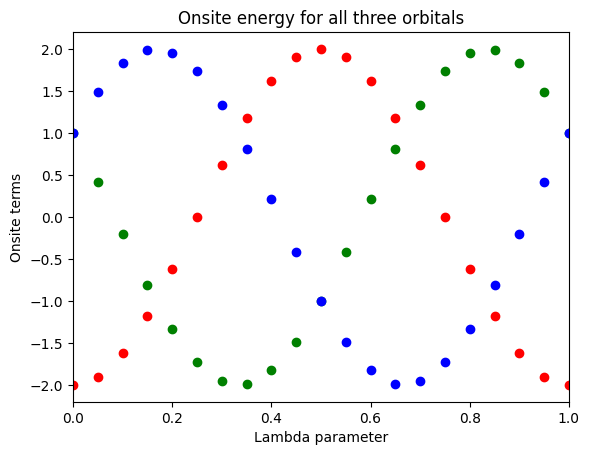

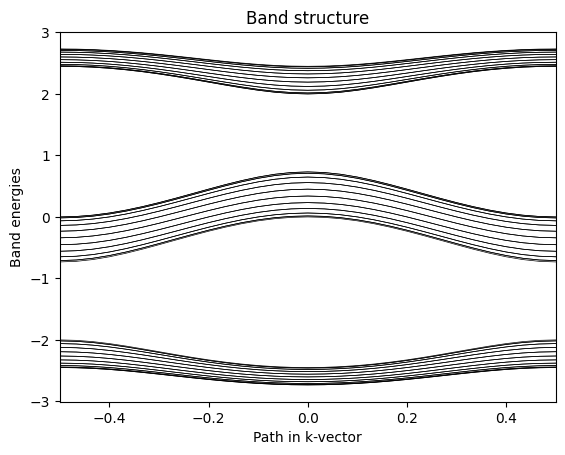

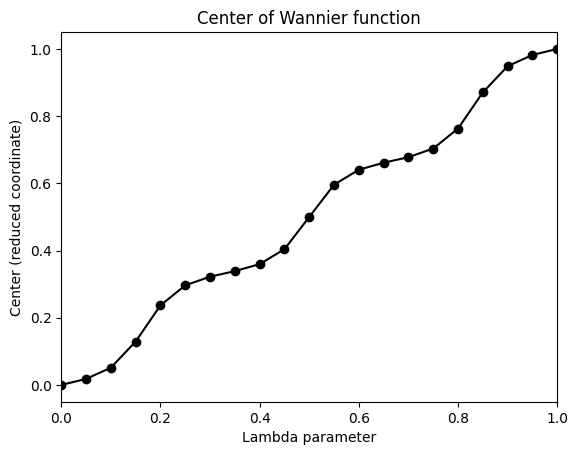

In [11]:
fig_onsite, ax_onsite = plt.subplots()
fig_band, ax_band = plt.subplots()
fig_wann, ax_wann = plt.subplots()

# plot on-site terms
ax_onsite.scatter(all_lambda, delta * -np.cos(2 * np.pi * (all_lambda - 0 / 3)), c="r")
ax_onsite.scatter(all_lambda, delta * -np.cos(2 * np.pi * (all_lambda - 1 / 3)), c="g")
ax_onsite.scatter(all_lambda, delta * -np.cos(2 * np.pi * (all_lambda - 2 / 3)), c="b")

for i_lambda in range(len(all_lambda)):
    # plot band structure for all three bands
    ax_band.plot(k_dist, eval_lam[:, i_lambda], "k-", linewidth=0.5)

# Wannier centers
ax_wann.plot(all_lambda, wann_center, "ko-")

# finish plot of onsite terms
ax_onsite.set_title("Onsite energy for all three orbitals")
ax_onsite.set_xlabel("Lambda parameter")
ax_onsite.set_ylabel("Onsite terms")
ax_onsite.set_xlim(0, 1)

# finish plot for band structure
ax_band.set_title("Band structure")
ax_band.set_xlabel("Path in k-vector")
ax_band.set_ylabel("Band energies")
ax_band.set_xlim(k_dist[0], k_dist[-1])

# finish plot for Wannier center
ax_wann.set_title("Center of Wannier function")
ax_wann.set_xlabel("Lambda parameter")
ax_wann.set_ylabel("Center (reduced coordinate)")
ax_wann.set_xlim(0, 1)
